<a href="https://colab.research.google.com/github/VandanGupte101727/AMAZON-stock-price-prediction-/blob/main/Amazon_Stock_price_prediction_model(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!pip install quandl
import quandl

**AMAZON STOCK PRICE DATASET **

In [17]:
data = pd.read_csv('/content/AMAZON_monthly.csv')

In [18]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-01,0.121875,0.125000,0.065625,0.075000,3286728000,0.075000
1,1997-06-01,0.075521,0.085417,0.068750,0.077083,1063272000,0.077083
2,1997-07-01,0.077083,0.128646,0.075521,0.119792,2172288000,0.119792
3,1997-08-01,0.117188,0.120833,0.096875,0.116927,638136000,0.116927
4,1997-09-01,0.117188,0.240625,0.115625,0.216927,2157240000,0.216927
...,...,...,...,...,...,...,...
335,2025-04-01,187.860001,198.339996,161.380005,184.419998,1313093300,184.419998
336,2025-05-01,190.630005,214.839996,183.850006,205.009995,937262700,205.009995
337,2025-06-01,204.979996,223.820007,202.679993,219.389999,870687900,219.389999
338,2025-07-01,219.500000,236.529999,217.929993,234.110001,856016400,234.110001


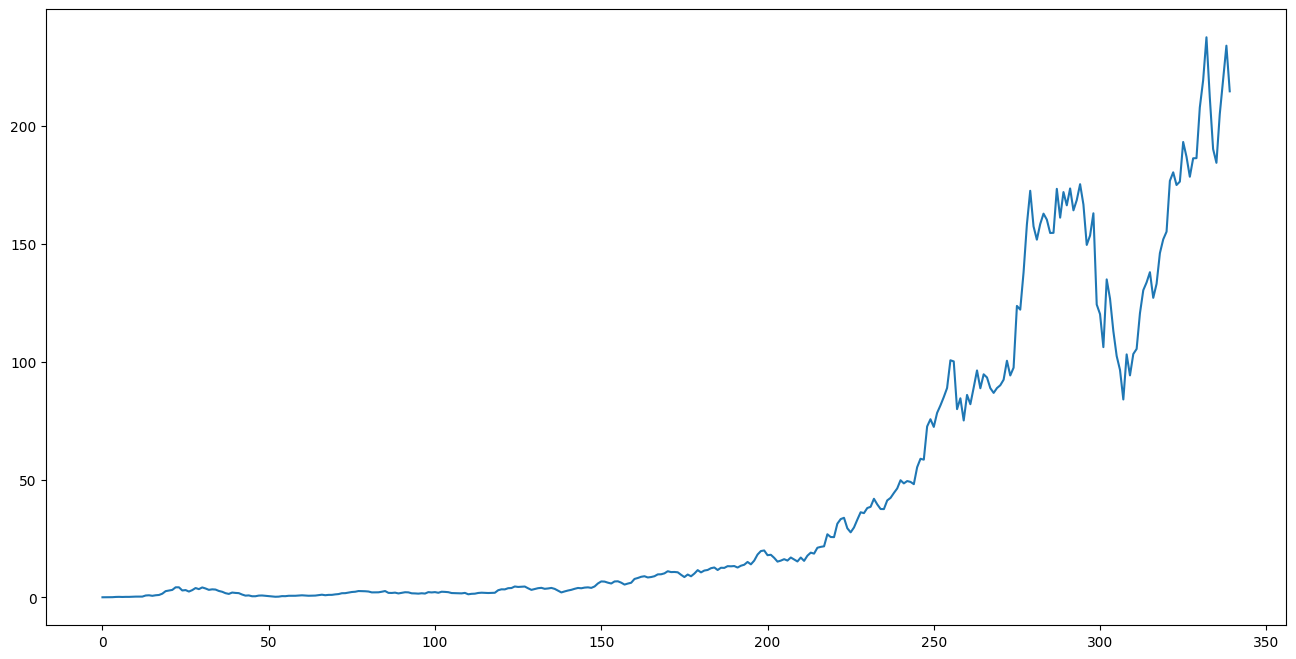

In [20]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label='Close Price')

**CLASSIFICATION:WHETHER TO BUY(+1) OR SELL THE STOCK(-1)**

In [24]:
data['Open-Close'] = data['Open'] - data['Close']
data['High-Low'] = data['High'] - data['Low']
data=data.dropna()

**INPUT FEATURES TO PREDICT WHETHER CUSTOMER SHOULD BUY OR SELL THE STOCK **

In [26]:
X = data [['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
0,0.046875,0.059375
1,-0.001562,0.016667
2,-0.042709,0.053125
3,0.000261,0.023958
4,-0.099739,0.125000


In [27]:
Y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [28]:
Y

array([ 1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
        1,  1, -1, -1,  1

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=44)

*IMPLEMENTATION OF KNN CLASSFIER*

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

model.fit(X_train,Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

accuracy_train=accuracy_score(Y_train, Y_pred_train)
accuracy_test=accuracy_score(Y_test, Y_pred_test)

print('Train data accuracy: %2f'%accuracy_train)
print('Test data accuracy: %2f'%accuracy_test)

Train data accuracy: 0.687500
Test data accuracy: 0.573529


In [36]:
predicttions_classification=model.predict(X_test)
predicttions_classification

actual_predicted_data=pd.DataFrame({'Actual':Y_test,'Predicted':predicttions_classification})
actual_predicted_data

,Actual,Predicted
0,1,1
1,-1,1
2,1,1
3,1,1
4,1,1
...,...,...
63,-1,1
64,-1,-1
65,1,1
66,1,1


In [5]:
import pandas as pd

data = pd.read_csv('/content/AMAZON_monthly.csv')

Y = data['Close']


In [6]:
Y

,Close
0,0.075000
1,0.077083
2,0.119792
3,0.116927
4,0.216927
...,...
335,184.419998
336,205.009995
337,219.389999
338,234.110001
